# BASICS OF PYTHON | SESSION 5

---
Sina Shafiezadeh | October 2024
---
Beatrice La Rocca Final Exam

Please follow the next steps over the next 3 hours in order to complete your exam successfully:


1. Download **Spotify Song Attributes** dataset from [HERE](https://www.kaggle.com/datasets/geomack/spotifyclassification).
2. Import dataset in **Google Colab**.
3. Overview dataset and define **one reasonable question**. An important point is to select a question that you will be able to implement statistical tests and plotting.
4. **Preprocess** the dataset to start your analysis.
5. Implement the **statistical models**.
6. **Plot** your results.
7. Set up your **GitHub** account. You can get help from this [LINK](https://docs.aws.amazon.com/codedeploy/latest/userguide/tutorials-github-create-github-account.html).
8. Upload your code and results in a **repository**.
9. Modify the repository title and description then **publish it**.
10. **Share your public repository** [HERE](https://docs.google.com/spreadsheets/d/1bveNOi9efLNgxqxh5uH5xhNG57bQ7DPCnG_sLAX4wmY/edit?usp=sharing).


# 1.&nbsp;Data Importing

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files

uploaded = files.upload()


filename = next(iter(uploaded))

# Read the CSV file
data = pd.read_csv(filename)

# Display the first few rows of the dataframe, just in case i uploaded something wrong
print(data.head())
# Read the CSV file
data = pd.read_csv(filename)
print (data)

Saving data.csv to data (2).csv
   Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0           0        0.0102         0.833       204600   0.434   
1           1        0.1990         0.743       326933   0.359   
2           2        0.0344         0.838       185707   0.412   
3           3        0.6040         0.494       199413   0.338   
4           4        0.1800         0.678       392893   0.561   

   instrumentalness  key  liveness  loudness  mode  speechiness    tempo  \
0          0.021900    2    0.1650    -8.795     1       0.4310  150.062   
1          0.006110    1    0.1370   -10.401     1       0.0794  160.083   
2          0.000234    2    0.1590    -7.148     1       0.2890   75.044   
3          0.510000    5    0.0922   -15.236     1       0.0261   86.468   
4          0.512000    5    0.4390   -11.648     0       0.0694  174.004   

   time_signature  valence  target      song_title            artist  
0             4.0    0.286       1        M

# 2.&nbsp;Data Cleaning (overview)

In [ ]:
print(data.shape)
# to get an idea of the data I want to first look at its shape
print(data.info())
#To get a better understanding of the differnt information contained in this dataset I have a look at the columns, here I can see the type of values that I'm dealing with
print(data.head(70))
#Now, I look at the first 70 rows to get an Idea of the type of music and the scores to each category
#Interesting values we are dealing with here, by looking at the data I think I would like to investigate the relationship between tempo, duration and danceability
#Moreover, I would like to look into whether tempo and duration determines the degree of danceability.
#First off, since I want to look at tempo and danceability and duration I have to understand what are the units we are employing and how many missing values we have.Let's look closely at danceability
sorted_dance = data.sort_values(by='danceability')
missing_dance_values = data['danceability'].isnull()
missing_dance_count = data['danceability'].isnull().sum()
print(sorted_dance['danceability'])#danceability seems to have values that go from 0 to 1
print(missing_dance_values)
print(missing_dance_count) #there are NO missing values! very well I don't have to deal with missing values

#now, let's look at tempo, shall we:
sorted_tempo= data.sort_values(by='tempo')
print(sorted_tempo['tempo'])
missing_tempo_values = data['tempo'].isnull()
missing_tempo_count = data['tempo'].isnull().sum()
print(missing_tempo_count)
#tempo is less straight forward and it has values with a minimum of 47.859 up to a max of 202.013, I guess it refers to BPM
# Good news: no missing values
sorted_duration= data.sort_values(by='duration_ms')
print(sorted_tempo['duration_ms'])
missing_duration_values = data['duration_ms'].isnull()
missing_duration_count = data['duration_ms'].isnull().sum()
print(missing_tempo_count)


(2017, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null

# 3.&nbsp;Data Cleaning (interpretability)

In [ ]:


#Ok, now I don't need danceability values with 3 positions after the point; I want rounded data to better understand my final results
data['danceability'] = np.round(data['danceability'],2)
print(data ['danceability']) #ahh, much better
#now let's try and understand better the TEMPO, tempo is measured in BPM and we don't need decimals
data['tempo']= np.round(data['tempo'])
print(data['tempo'])
#duration in ms???? What is this psychophysiology? I think we can work way better with minutes
data['duration_ms'] = np.round(data['duration_ms']/ 60000 ,2)

print(data['duration_ms'])



0       0.83
1       0.74
2       0.84
3       0.49
4       0.68
        ... 
2012    0.58
2013    0.89
2014    0.64
2015    0.56
2016    0.45
Name: danceability, Length: 2017, dtype: float64
0       150.0
1       160.0
2        75.0
3        86.0
4       174.0
        ...  
2012     75.0
2013    110.0
2014    150.0
2015    150.0
2016    190.0
Name: tempo, Length: 2017, dtype: float64
0       3.41
1       5.45
2       3.10
3       3.32
4       6.55
        ... 
2012    4.57
2013    3.04
2014    3.45
2015    3.09
2016    3.41
Name: duration_ms, Length: 2017, dtype: float64


# 4.&nbsp;Data Cleaning (reduction)

In [ ]:
#now, since I don't want the additional data I can work on the variables of interest by creating a new dataframe entailing only what I need
df = data[['danceability', 'tempo', 'duration_ms']]
 #ahh better, so much better, plus I get to keep the raw data in case I want to study other pheonomena of the musical realm
#But wait a minute (pun intended)!
#I have a column still called duration_ms even though I transformed the values in min, I should change this or else confusion will arise:
df.rename(columns={'duration_ms': 'duration_min'}, inplace=True)
print(df)




      danceability  tempo  duration_min
0             0.83  150.0          3.41
1             0.74  160.0          5.45
2             0.84   75.0          3.10
3             0.49   86.0          3.32
4             0.68  174.0          6.55
...            ...    ...           ...
2012          0.58   75.0          4.57
2013          0.89  110.0          3.04
2014          0.64  150.0          3.45
2015          0.56  150.0          3.09
2016          0.45  190.0          3.41

[2017 rows x 3 columns]


<ipython-input-72-ddd25af2c676>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'duration_ms': 'duration_min'}, inplace=True)


Index(['danceability', 'tempo', 'duration_min'], dtype='object')

# 5.&nbsp;Data Cleaning (noisy data)

In [ ]:
#I don't need to consider songs that are shorter than 30 sec

df=df[df['duration_min'] > 0.30]
print(df['duration_min'])
#we lost some datapoints (2)

#I also don't need danceabilty values that are too close to 0, threshold set to 0.01

df=df[df['danceability']>0.01]
print(df['danceability'])




0       3.41
1       5.45
2       3.10
3       3.32
4       6.55
        ... 
2012    4.57
2013    3.04
2014    3.45
2015    3.09
2016    3.41
Name: duration_min, Length: 2015, dtype: float64
0       0.83
1       0.74
2       0.84
3       0.49
4       0.68
        ... 
2012    0.58
2013    0.89
2014    0.64
2015    0.56
2016    0.45
Name: danceability, Length: 2015, dtype: float64


# 6.&nbsp;Data Cleaning (completeness)

In [ ]:
#I want to consider danceability values that are available, and eliminate NaN
df = df[df['danceability'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2015 entries, 0 to 2016
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   danceability  2015 non-null   float64
 1   tempo         2015 non-null   float64
 2   duration_min  2015 non-null   float64
dtypes: float64(3)
memory usage: 63.0 KB


# 7.&nbsp;Data Exploring


In [ ]:
#let's see how many songs are longer than 2 min and have a danceability of 0.8 min and a slow tempo
first_exploration=df[(df['duration_min']>2) & (df['danceability']>0.79) & (df['tempo']<=60)]
print(first_exploration) #wow, none
#let's see how many songs are longer than 3 min, with a good danceability and a high tempo
second_exploration=df[(df['duration_min']>3) & (df['danceability']>0.79) & (df['tempo']> 80)]
print(second_exploration)
#I think I see a trend....

Empty DataFrame
Columns: [danceability, tempo, duration_min]
Index: []
      danceability  tempo  duration_min
0             0.83  150.0          3.41
5             0.80   85.0          4.19
9             0.84  100.0          3.78
20            0.85  128.0          4.15
22            0.85  140.0          4.78
...            ...    ...           ...
1957          0.96  115.0          4.48
1959          0.84  104.0          3.41
1972          0.85  131.0          3.70
1984          0.90   97.0          3.63
2013          0.89  110.0          3.04

[242 rows x 3 columns]


# 8.&nbsp;Data Analysis

In [ ]:
#I think here we want to see first which attributes are correlated
correlation_data = df[['danceability', 'tempo', 'duration_min']].corr().round(2)
print(correlation_data)

#no strong correlations, let's see how tempo and duration might predict danceability
import statsmodels.api as sm
X = df[['tempo', 'duration_min']]  # Independent variables
y = df['danceability']               # Dependent variable

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the summary of the regression results
print(model.summary())

              danceability  tempo  duration_min
danceability          1.00  -0.15          0.00
tempo                -0.15   1.00         -0.08
duration_min          0.00  -0.08          1.00
                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     21.72
Date:                Fri, 11 Oct 2024   Prob (F-statistic):           4.65e-10
Time:                        13:47:03   Log-Likelihood:                 842.78
No. Observations:                2015   AIC:                            -1680.
Df Residuals:                    2012   BIC:                            -1663.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  

This value indicates that only 2.1% of the variance in danceability is explained by the model. This is quite low, suggesting that the independent variables (tempo and duration) do not explain much of the variability in danceability.

**tempo -0.0009:** This indicates that for every 1 BPM increase in tempo, danceability is expected to decrease by approximately 0.0009 units, holding duration constant.

**duration_min -0.0012:** This indicates that for every additional minute in duration, danceability is expected to decrease by approximately 0.0012 units, holding tempo constant. But sadly this is not statistically significant....



# 9.&nbsp;Data Visualization

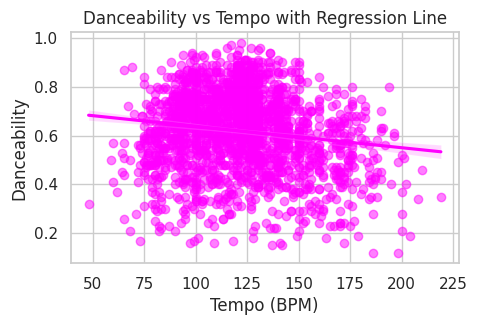

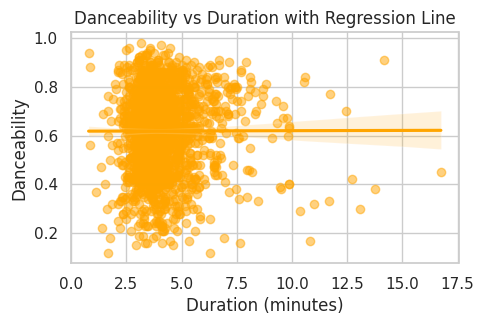

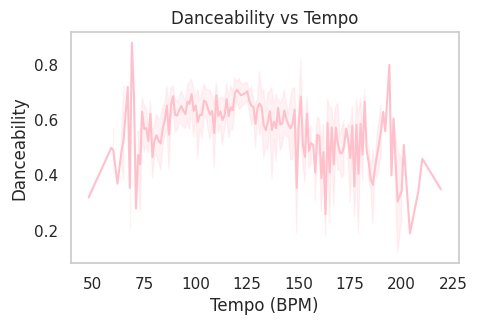

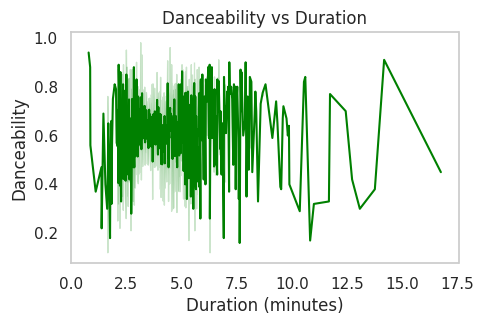

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5, 3))
sns.regplot(x='tempo', y='danceability', data=df, color='magenta', scatter_kws={'alpha':0.5})
plt.title('Danceability vs Tempo with Regression Line')
plt.xlabel('Tempo (BPM)')  # Predictor on X-axis
plt.ylabel('Danceability')  # Response on Y-axis
plt.show()

# Scatter plot of Danceability vs Duration
plt.figure(figsize=(5, 3))
scatterplot2=sns.regplot(x='duration_min', y='danceability', data=df, color='orange', scatter_kws={'alpha':0.5})
plt.title('Danceability vs Duration with Regression Line')
plt.xlabel('Duration (minutes)')  # Predictor on X-axis
plt.ylabel('Danceability')          # Response on Y-axis
plt.show()

# Line plot for Danceability vs Duration
#I know that lineplots are better for timeseries but I guess duration and BPM has to do with timeseries?
plt.figure(figsize=(5, 3))
sns.lineplot(x='tempo', y='danceability', data=df, color='pink')
plt.title('Danceability vs Tempo')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Danceability')
plt.grid()
plt.show()


plt.figure(figsize=(5, 3))
sns.lineplot(x='duration_min', y='danceability', data=df, color='green')
plt.title('Danceability vs Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Danceability')
plt.grid()
plt.show()





# 10.&nbsp;Data Exporting

In [ ]:

data.to_csv('df.csv', header=True, index=True)

